## Introduction to SNT Programming

<div class="alert alert-block alert-warning">
<b>Important:</b> 
Make sure PySNT is properly 
<a href="../install.html">installed</a> before running this notebook.
</div>

## Initializing
Let's get started! Once installed, `pysnt` is imported as any other module. However it is only available once the gateway is initialized:

In [ ]:
import pysnt
pysnt.initialize() # initialize with default options

<div class="alert alert-block alert-info">
<b>Important:</b> 
pysnt is only available <i>after</i> <tt>pysnt.initialize()</tt> is called.
</div>

There are also some advanced initialization options:

| Code | Comments |
| ---- | -------- |
|`pysnt.initialize('/path/to/Fiji.app')` | Loads SNT from the specified Fiji installation |
| `pysnt.initialize('interactive')` | See [pyimagej initialization mode](https://py.imagej.net/en/latest/Initialization.html#how-to-initialize-pyimagej) |
| `pysnt.initialize('/path/to/Fiji.app', interactive=True, ensure_java=True, mode'headless')` | See [API](../api_auto/pysnt.core.html#module-pysnt.core) |

## Setting Options
PySNT provides a pandas-style configuration system that allows you to customize various preferences and setting. Here are some of the most common options:

| Setting | Type | Description | Default |
|---------|------|-------------|---------|
| display.chart_format | str | Default export format for SNTChart (svg, png, or pdf) | png |
| display.gui_safe_mode | bool | Use safe GUI mode to avoid threading issues on macOS | True |
| display.max_columns | int | Maximum number of columns to display in table outputs | 20 |
| display.max_rows | int | Maximum number of rows to display in table outputs | 100 |
| display.precision | int | Number of decimal places to display for floating point numbers | 6 |
| display.table_mode | str | Default display mode for SNTTables (pandasgui, distribution, summary, or basic) | basic |
| plotting.figure_size | tuple | Default figure size for plots as (width, height) in inches | (8, 8) |
| pyplot.ion | bool | Enable matplotlib interactive mode (plt.ion()) for better plot display | True |
| graph.processing.warn_self_loops | bool | Warn when self-loops are detected in neural morphology graphs | True |
| graph.layout.AnnotationGraph | str | Default layout algorithm for AnnotationGraph (brain regions) | circular |
| graph.layout.DirectedWeightedGraph | str | Default layout algorithm for DirectedWeightedGraph (neural morphology) | spring |

E.g., to have tables displayed in an interactive window, one can use:

In [ ]:
pysnt.set_option('display.table_mode', 'pandasgui')

To list available options or know more about them, you can use:

In [ ]:
# List all available options
options = pysnt.list_options()
print(options)

# Get detailed descriptions
pysnt.describe_option()  # Describe all options
pysnt.describe_option('display.chart_format')  # Describe specific option

## Instantiation of Classes

Instantiation of classes is done **directly from the pysnt gateway**. E.g., to initialize SNTService<sup>1</sup>:

In [ ]:
import pysnt
pysnt.initialize()

from pysnt import SNTService
snt_service = SNTService() # Instantiate SNTService 

<sup>1</sup> SNTService is SNT's SciJava service that provides convenience access to SNT, and common operations (like accessing the current instance of the program, or accessing demo datasets).

## Curated vs Extended Classes

PySNT has two type of classes:

1. Curated Classes: Always available for direct import. These work as any other Python class (IDE autocompletion, etc.)

2. Extended Classes: Discovered dynamically, loaded lazily. The expectation is that extended classes are not needed: these are either not relevant to Python scripting, too experimental, or both.

However, you can still access extended classes

In [ ]:
pysnt.get_available_classes() # list available classes, including extended classes
pysnt.extended_classes() # list extended classes

## Loading a Tree

Let's load a neuron (a [Tree](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/Tree.html)) from the [MouseLight database](http://ml-neuronbrowser.janelia.org/). We will be using the [Scijava](https://javadoc.scijava.org/) and [SNT](https://morphonets.github.io/SNT/) APIs frequently. The most up-to-date SNT API is found at https://morphonets.github.io/SNT/. After skimming through it, we know that, e.g., we can use 
[MouseLightLoader](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/io/MouseLightLoader.html):

In [ ]:
MouseLightLoader = autoclass('sc.fiji.snt.io.MouseLightLoader')

Now we can access all the attributes and methods this class offers. Let's load a specific mouse cortical motor neuron (ID = "AA0100" in the [MouseLight database](http://ml-neuronbrowser.janelia.org/)). First, we initialize ```MouseLightLoader``` with the ID String of the desired reconstruction. The loader object has methods to check database availability and validity of passed IDs:

In [ ]:
loader = MouseLightLoader("AA0100")
if not loader.isDatabaseAvailable():
    print("Could not connect to ML database", "Error")
if not loader.idExists():
    print("Somehow the specified id was not found", "Error")

To extract a specific neurite compartment from the loader object as a [Tree](https://morphonets.github.io/SNT/sc/fiji/snt/Tree.html), we can call ```loader.getTree(compartment_string)```
where compartment_string may be - 'soma', 'axon', 'dendrite', or 'all' (case insensitive). Leaving the argument empty will return all compartments.

In [ ]:
axon = loader.getTree('axon')

Let's visualize the axonal Tree. SNT offers a handful of [dedicated viewers](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/Tree.html) for both single cells and cell groups. [Viewer2D](https://morphonets.github.io/SNT/sc/fiji/snt/viewer/Viewer2D.html) (_Reconstruction Plotter_) and [Viewer3D](https://morphonets.github.io/SNT/sc/fiji/snt/viewer/Viewer3D.html) (_Reconstruction Viewer_) are the most frequently used. By calling `show()`, SNT will automatically choose a suitable viewer, but we can impose the display of 2D projection of the reconstruction by calling `show2D()`:

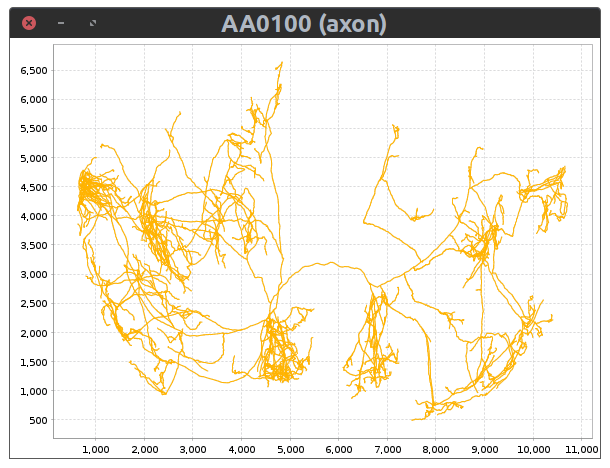

In [ ]:
axon.show2D()

#from IPython.display import Image, display
#display(Image(filename=r"./images/AA0100plotter.png",  width=500))

To visualize the cell in 3D we can use `show3D()`, to display the axon on a interactive 3D canvas. But if we want the enriched experience of a standalone [Reconstruction Viewer](https://imagej.net/SNT:_Reconstruction_Viewer) we need to pass a [SciJava Context](https://javadoc.scijava.org/SciJava/org/scijava/Context.html) Class to the Viewer's constructor:

In [ ]:
Context = autoclass('org.scijava.Context')
Viewer3D = autoclass('sc.fiji.snt.viewer.Viewer3D')
viewer_3d = Viewer3D(Context())

Now, we can enrich the scene, and use the GUI controls of the Viewer to import, manage and customize the Viewer's scene:

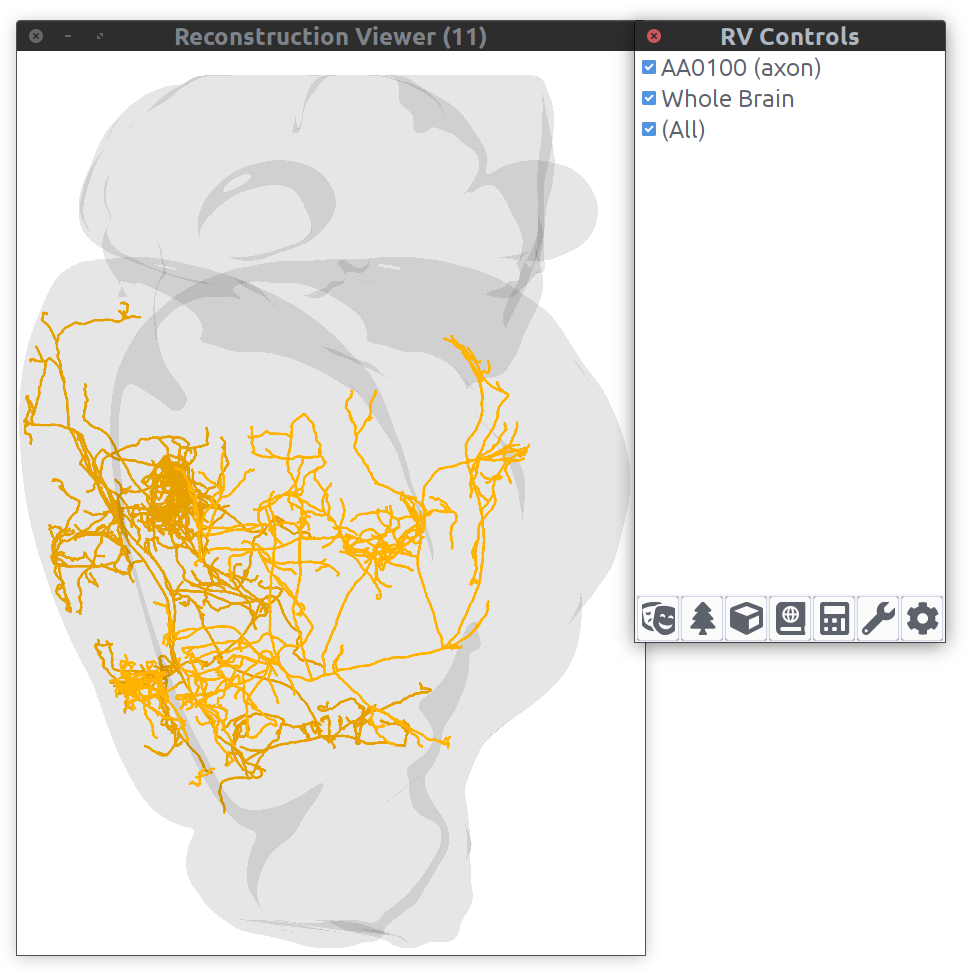

In [ ]:
viewer_3d.setEnableDarkMode(False)
viewer_3d.add(axon)
viewer_3d.loadRefBrain('mouse')
viewer_3d.setViewMode('sagittal')
viewer_3d.setAnimationEnabled(True)
viewer_3d.show()

#from IPython.display import Image, display
#display(Image(filename=r"./images/AA0100viewer.png",  width=650))

We can also retrieve a skeletonized mask (2D or 3D) of a Tree:

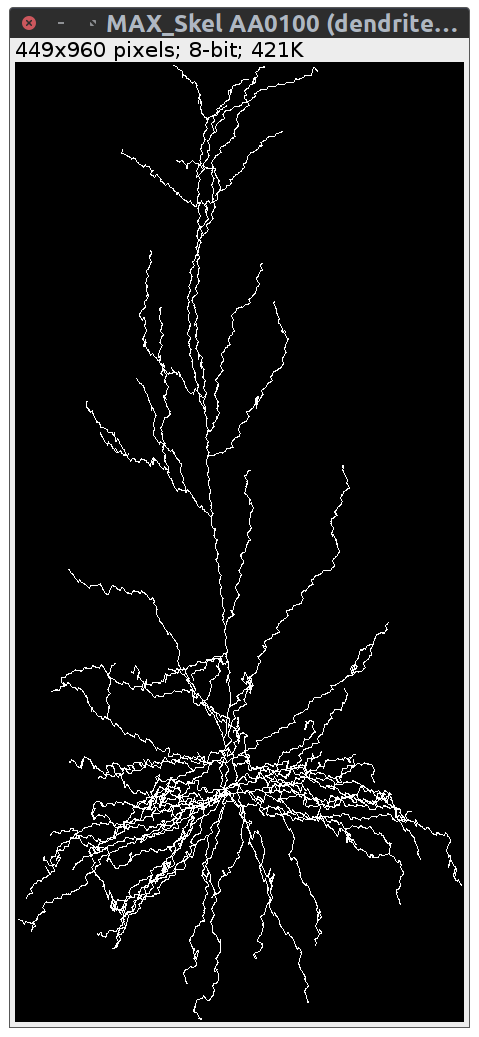

In [ ]:
dendrites = loader.getTree('dendrites')
dendrites.getSkeleton2D().show()

#from IPython.display import Image, display
#display(Image(filename=r"./images/AA0100skel2d.png",  width=300))

[Convertion to ROIs](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/analysis/RoiConverter.html) is also possible.

## Measuring a Tree

Most simply, a Tree can be measured using [TreeAnalyzer](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/analysis/TreeAnalyzer.html) and its extending class [TreeStatistics](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/analysis/TreeAnalyzer.html) (other classes in the [analysis package](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/analysis/package-summary.html) provide further functionality). We can construct an instance of `TreeStatistics` class using the axon `Tree`:

In [ ]:
TreeStatistics = autoclass('sc.fiji.snt.analysis.TreeStatistics')
t_stats = TreeStatistics(axon)

Both [TreeAnalyzer](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/analysis/TreeAnalyzer.html) and [TreeStatistics](https://morphonets.github.io/SNT/index.html?sc/fiji/snt/analysis/TreeAnalyzer.html):
provide a variety of metrics with which to measure reconstructions: The former will tipically retrieve single  value measurements: e.g. `getCableLength()` while the latter extends TreeAnalyzer to allow access to distribution statistics.

To see the full list of supported metrics, we can use `getAllMetrics()`. Importantly, the Object returned by this method is a [Java List](https://javadoc.scijava.org/Java8/index.html?java/util/List.html), and should be converted to the equivalent Python representation before attempting to iterate over it. We can do this using pyimagej's `ij.py.from_java()` method:

In [ ]:
ta_metrics = ij.py.from_java(t_stats.getAnalyzerMetrics())
ts_metrics = ij.py.from_java(t_stats.getAllMetrics())

print("\nTreeAnalyzer metrics:")
print(*ta_metrics, sep = ", ")
print("\nTreeStatistics metrics:")
print(*ts_metrics, sep = ", ")


TreeAnalyzer metrics:
Assigned value, Average branch length, Average contraction, Depth, Height, Highest path order, Cable length, Mean radius, No. of branch points, No. of branches, No. of fitted paths, No. of nodes, No. of paths, No. of primary branches, No. of terminal branches, No. of tips, Length of primary branches (sum), Horton-Strahler number, Horton-Strahler bifurcation ratio, Length of terminal branches (sum), Width

TreeStatistics metrics:
Branch length, Contraction, Inter-node distance, Inter-node distance (squared), Path mean radius, No. of branch points, No. of nodes, Node radius, Path length, Path order, Length of primary branches, Length of terminal branches, Node intensity values, X coordinates, Y coordinates, Z coordinates


These metrics can be used to retrieve computations, distributions, etc. Here is an example:

In [ ]:
metric = "Inter-node dx" #fuzzy matching is supported so we can abbreviate distance
summary_stats = t_stats.getSummaryStats(metric)
print("The average inter-node distance is %d micrometers" % summary_stats.getMean())
print("The standard deviation is %d" % summary_stats.getStandardDeviation())

The average inter-node distance is 21 micrometers
The standard deviation is 12


We can also plot histograms directly:

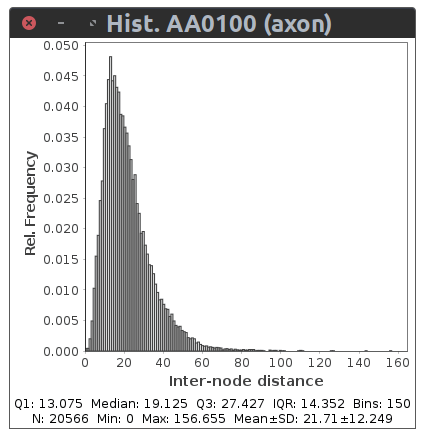

In [ ]:
t_stats.getHistogram(metric).show()

#from IPython.display import Image, display
#display(Image(filename=r"./images/AA0100hist.png",  width=400))

Since TreeStatistics extends TreeAnalyzer, we can also access all of TreeAnalyzer's functionality from the `t_stats` instance:

In [ ]:
print("The cable length of the axon is %d micrometers" % t_stats.getCableLength())

The cable length of the axon is 446486 micrometers


## Accessing Neuropil Annotations

Where does this axon project to? TreeStatistics is also aware of the location of each node in the brain. So we can, e.g., find out cable length is distributed across brain regions. For clarity, we will focus on brain regions of a specific (mid) ontology level of the [Allen Brain Atlas](http://mouse.brain-map.org/):

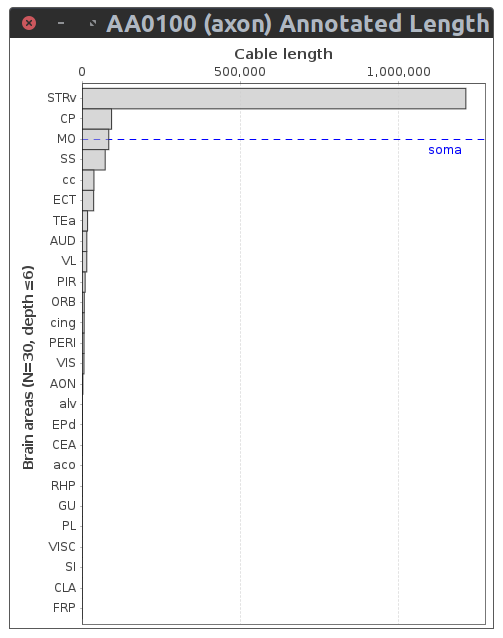

In [ ]:
t_stats.getAnnotatedLengthHistogram(6).show()

#from IPython.display import Image, display
#display(Image(filename=r"./images/AA0100annot.png",  width=400))

Have a look at remaining [notebooks](./) for further examples.